# Unfolding of surfaces - test example

In [1]:
import numpy as np
import unfolding
from unfolding._utils import dummy
from matplotlib import pyplot as plt

Create a test dataset



Text(0.5, 1.0, 'Dummy label')

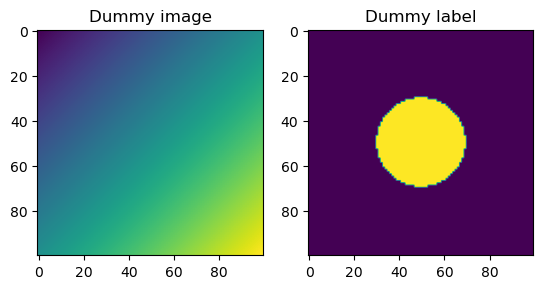

In [2]:
image, label = dummy()
plt.subplot(121)
plt.imshow(image[50])
plt.title('Dummy image')
plt.subplot(122)
plt.imshow(label[50])
plt.title('Dummy label')

Compute the surface mesh from the label

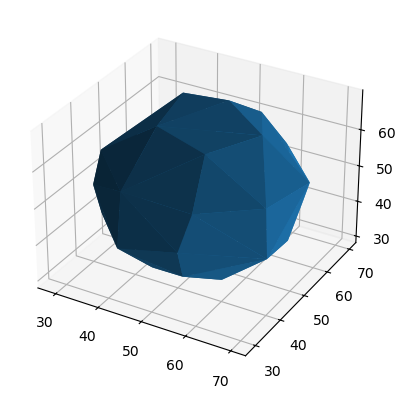

In [3]:
verts,faces = unfolding.create_simplified_tessellation(label, 30)
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(verts[:,0], verts[:,1], verts[:,2],triangles=faces)

Unfold the tesselation

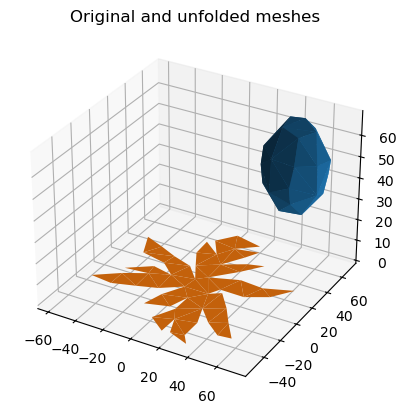

In [4]:
verts_2d, faces_2d, dict_2d_3d = unfolding.unfold_tessellation(
    verts, faces, base_triangle=0, draw=0
)

verts_2d = np.stack(verts_2d)
verts = np.stack(verts)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(verts[:,0], verts[:,1],  verts[:,2], triangles=faces)
ax.plot_trisurf(verts_2d[:,0], verts_2d[:,1],  0*verts_2d[:,1], triangles=faces_2d)
plt.title("Original and unfolded meshes");

Extract the layers from the surfaces

100%|██████████| 56/56 [00:11<00:00,  4.89it/s]


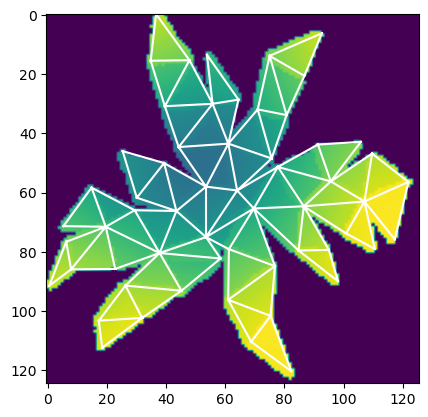

In [5]:
# unfold and extract layers
layers = unfolding.unfolded_layers(
    verts, faces, verts_2d, faces_2d, dict_2d_3d, image, n_layers=20
)

plt.imshow(layers[...,0])
plt.triplot(verts_2d[:,1]+53.5, verts_2d[:,0]+58, triangles=faces_2d,color='w')


Interactive display

In [6]:

triangles_3d, triangles_2d = unfolding.draw_triangles_in_3d_and_2d(
    verts, faces, verts_2d, faces_2d, dict_2d_3d, image.shape
)

unfolding.show_3d_and_contours(np.max(layers, axis=2, keepdims=True), triangles_2d, [0, 5])


100%|██████████| 56/56 [00:01<00:00, 48.86it/s]


interactive(children=(FloatSlider(value=0.0, description='Slice: ', max=0.0, readout_format='', step=1.0, styl…

### MDS


In [1]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, metric=False, normalized_stress = 'auto')
verts_2d_mds = embedding.fit_transform(verts)
plt.triplot(verts_2d_mds[:,1], verts_2d_mds[:,0], triangles=faces)

NameError: name 'verts' is not defined